## novel covid-19 **LSTM**

In [0]:
#import libs
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
import plotly as py
import plotly.express as px

pd.set_option('display.max_rows', 500)

In [3]:
c_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covid_19_data_2.csv')
df = c_df.copy()
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df.shape

(5890, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5890 entries, 0 to 5889
Data columns (total 8 columns):
SNo                5890 non-null int64
ObservationDate    5890 non-null object
Province/State     3575 non-null object
Country/Region     5890 non-null object
Last Update        5890 non-null object
Confirmed          5890 non-null float64
Deaths             5890 non-null float64
Recovered          5890 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 368.2+ KB


**EDA on dataset**

In [6]:
df.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     2315
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [7]:
nan_states_df = df[df['Province/State'].isnull()]

print('nan_states_df shape is : '+ str(nan_states_df.shape))
print('nan_states_df has got : '+ str(nan_states_df['Country/Region'].nunique()) + ' unique Country/Region values')

nan_states_df = nan_states_df[['ObservationDate','Country/Region','Confirmed','Deaths','Recovered']]
nan_states_df.head()

nan_states_df shape is : (2315, 8)
nan_states_df has got : 155 unique Country/Region values


,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
35,01/22/2020,Japan,2.0,0.0,0.0
36,01/22/2020,Thailand,2.0,0.0,0.0
37,01/22/2020,South Korea,1.0,0.0,0.0
73,01/23/2020,Japan,1.0,0.0,0.0
74,01/23/2020,Thailand,3.0,0.0,0.0


In [8]:
states_df = df[df['Province/State'].notnull()]

print('states_df shape is : '+ str(states_df.shape))
print('states_df has got : '+ str(states_df['Province/State'].nunique()) + ' unique Province/State values')
 
states_df = states_df[['ObservationDate','Province/State','Country/Region','Confirmed','Deaths','Recovered']]
states_df.head()

states_df shape is : (3575, 8)
states_df has got : 265 unique Province/State values


,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [9]:
concentrated_states_df= states_df.groupby(['ObservationDate','Country/Region'])[['Confirmed','Deaths','Recovered']].sum().reset_index()
concentrated_states_df.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,0.0,0.0,0.0
1,01/22/2020,Macau,1.0,0.0,0.0
2,01/22/2020,Mainland China,547.0,17.0,28.0
3,01/22/2020,Taiwan,1.0,0.0,0.0
4,01/22/2020,US,1.0,0.0,0.0


In [10]:
full_countries_df = pd.concat([nan_states_df, concentrated_states_df], axis=0).reset_index()
full_countries_df.head()

,index,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,35,01/22/2020,Japan,2.0,0.0,0.0
1,36,01/22/2020,Thailand,2.0,0.0,0.0
2,37,01/22/2020,South Korea,1.0,0.0,0.0
3,73,01/23/2020,Japan,1.0,0.0,0.0
4,74,01/23/2020,Thailand,3.0,0.0,0.0


In [11]:
lastest_full_countries_df = full_countries_df.groupby(['Country/Region'])[['ObservationDate','Confirmed','Deaths','Recovered']].max().reset_index()
lastest_full_countries_df.head()

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
0,Azerbaijan,02/28/2020,1.0,0.0,0.0
1,"('St. Martin',)",03/10/2020,2.0,0.0,0.0
2,Afghanistan,03/15/2020,16.0,0.0,0.0
3,Albania,03/15/2020,42.0,1.0,0.0
4,Algeria,03/15/2020,48.0,4.0,12.0


In [12]:
china_df = states_df[states_df['Country/Region']=='Mainland China'] 
china_df.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [13]:
lastest_china_df = china_df.groupby(['Province/State']).max().reset_index()
lastest_china_df.head()

,Province/State,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,Anhui,03/15/2020,Mainland China,990.0,6.0,984.0
1,Beijing,03/15/2020,Mainland China,442.0,8.0,353.0
2,Chongqing,03/15/2020,Mainland China,576.0,6.0,570.0
3,Fujian,03/15/2020,Mainland China,296.0,1.0,295.0
4,Gansu,03/15/2020,Mainland China,133.0,2.0,91.0


In [14]:
print('Total countries affected by covid virus: ' + str(lastest_full_countries_df['Country/Region'].nunique()) + '\n' + 'That countries are : ' +'\n'+str(lastest_full_countries_df['Country/Region'].unique()) )

Total countries affected by covid virus: 161
That countries are : 
[' Azerbaijan' "('St. Martin',)" 'Afghanistan' 'Albania' 'Algeria'
 'Andorra' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Channel Islands' 'Chile' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'Equatorial Guinea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Faroe Islands' 'Finland' 'France' 'French Guiana' 'Gabon' 'Georgia'
 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Guadeloupe' 'Guatemala'
 'Guernsey' 'Guinea' 'Guyana' 'Holy See' 'Honduras' 'Hong Kong' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Ivory Coast' 'Jamaica' 'Jap

In [15]:
print('Worldwide Confirmed Cases: ',lastest_full_countries_df['Confirmed'].sum())
print('Worldwide Deaths: ',lastest_full_countries_df['Deaths'].sum())
print('Worldwide Recovered Cases: ',lastest_full_countries_df['Recovered'].sum())

Worldwide Confirmed Cases:  167544.0
Worldwide Deaths:  6441.0
Worldwide Recovered Cases:  76041.0


In [16]:
lastest_full_countries_df.sort_values(by='Confirmed', ascending=False)

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
90,Mainland China,03/15/2020,80848.0,3199.0,66926.0
74,Italy,03/15/2020,24747.0,1809.0,2335.0
70,Iran,03/15/2020,13938.0,724.0,4590.0
137,South Korea,03/15/2020,8162.0,75.0,510.0
138,Spain,03/15/2020,7798.0,289.0,517.0
54,Germany,03/15/2020,5795.0,11.0,46.0
50,France,03/15/2020,4513.0,91.0,12.0
152,US,03/15/2020,3499.0,63.0,12.0
144,Switzerland,03/15/2020,2200.0,14.0,4.0
108,Norway,03/15/2020,1221.0,3.0,1.0


In [17]:
sorted_lastest_full_countries_df = lastest_full_countries_df.sort_values(by='Confirmed', ascending=False)
sorted_lastest_full_countries_df[:10]

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
90,Mainland China,03/15/2020,80848.0,3199.0,66926.0
74,Italy,03/15/2020,24747.0,1809.0,2335.0
70,Iran,03/15/2020,13938.0,724.0,4590.0
137,South Korea,03/15/2020,8162.0,75.0,510.0
138,Spain,03/15/2020,7798.0,289.0,517.0
54,Germany,03/15/2020,5795.0,11.0,46.0
50,France,03/15/2020,4513.0,91.0,12.0
152,US,03/15/2020,3499.0,63.0,12.0
144,Switzerland,03/15/2020,2200.0,14.0,4.0
108,Norway,03/15/2020,1221.0,3.0,1.0


In [18]:
other_countries_df = full_countries_df[~(full_countries_df['Country/Region']=='Mainland China')]
other_countries_df.head()

lastest_other_countries_df = other_countries_df.groupby('Country/Region')[['Confirmed','Deaths','Recovered']].max().reset_index()


sorted_lastest_other_countries_df = lastest_other_countries_df.sort_values(by='Confirmed', ascending=False)

lastest_other_countries_df.head()

,Country/Region,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,16.0,0.0,0.0
3,Albania,42.0,1.0,0.0
4,Algeria,48.0,4.0,12.0


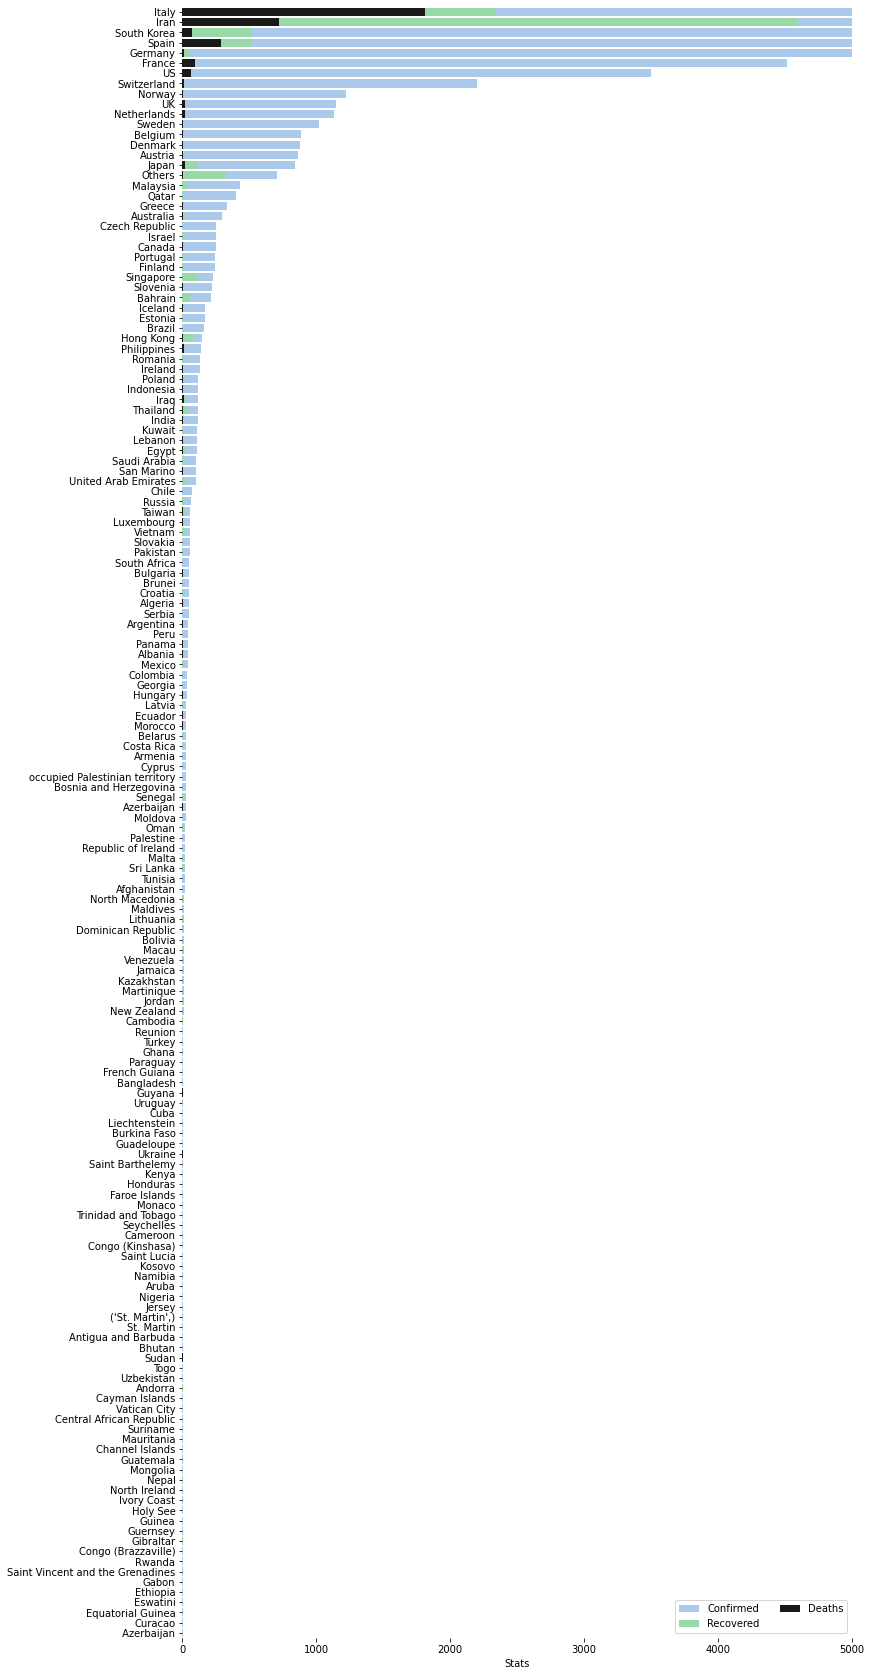

In [19]:
f, ax = plt.subplots(figsize=(12, 30))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Country/Region", data=sorted_lastest_other_countries_df[:],
            label="Confirmed", color="b")

sns.set_color_codes("pastel")
sns.barplot(x="Recovered", y="Country/Region", data=sorted_lastest_other_countries_df[:],
            label="Recovered", color="g")

sns.set_color_codes("pastel")
sns.barplot(x="Deaths", y="Country/Region", data=sorted_lastest_other_countries_df[:],
            label="Deaths", color="k")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 5000), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)

In [20]:
fig = px.pie(sorted_lastest_other_countries_df, values = 'Confirmed',names='Country/Region', height=600)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

In [21]:
sorted_lastest_full_countries_df[(sorted_lastest_full_countries_df['Confirmed'] == sorted_lastest_full_countries_df['Recovered'])]

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
89,Macau,03/15/2020,10.0,0.0,10.0
5,Andorra,03/15/2020,1.0,0.0,1.0
102,Nepal,03/15/2020,1.0,0.0,1.0
56,Gibraltar,03/10/2020,1.0,0.0,1.0


In [22]:
sorted_lastest_full_countries_df[(sorted_lastest_full_countries_df['Confirmed'] == sorted_lastest_full_countries_df['Deaths'])]

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
141,Sudan,03/15/2020,1.0,1.0,0.0


In [23]:
sorted_lastest_full_countries_df[(sorted_lastest_full_countries_df['Recovered'] < sorted_lastest_full_countries_df['Deaths'])]

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
50,France,03/15/2020,4513.0,91.0,12.0
152,US,03/15/2020,3499.0,63.0,12.0
144,Switzerland,03/15/2020,2200.0,14.0,4.0
108,Norway,03/15/2020,1221.0,3.0,1.0
151,UK,03/15/2020,1144.0,21.0,19.0
103,Netherlands,03/15/2020,1135.0,20.0,2.0
143,Sweden,03/15/2020,1022.0,3.0,1.0
16,Belgium,03/15/2020,886.0,4.0,1.0
40,Denmark,03/15/2020,875.0,2.0,1.0
135,Slovenia,03/15/2020,219.0,1.0,0.0


In [0]:
lastest_full_countries_df['Treatment'] = (lastest_full_countries_df['Confirmed']-(lastest_full_countries_df['Recovered']+lastest_full_countries_df['Deaths']))

Iran = lastest_full_countries_df[lastest_full_countries_df['Country/Region']=='Iran'][['Treatment','Recovered','Deaths']].iloc[0]
Spain = lastest_full_countries_df[lastest_full_countries_df['Country/Region']=='Spain'][['Treatment','Recovered','Deaths']].iloc[0]
SouthKorea = lastest_full_countries_df[lastest_full_countries_df['Country/Region']=='South Korea'][['Treatment','Recovered','Deaths']].iloc[0]
Italy = lastest_full_countries_df[lastest_full_countries_df['Country/Region']=='Italy'][['Treatment','Recovered','Deaths']].iloc[0]

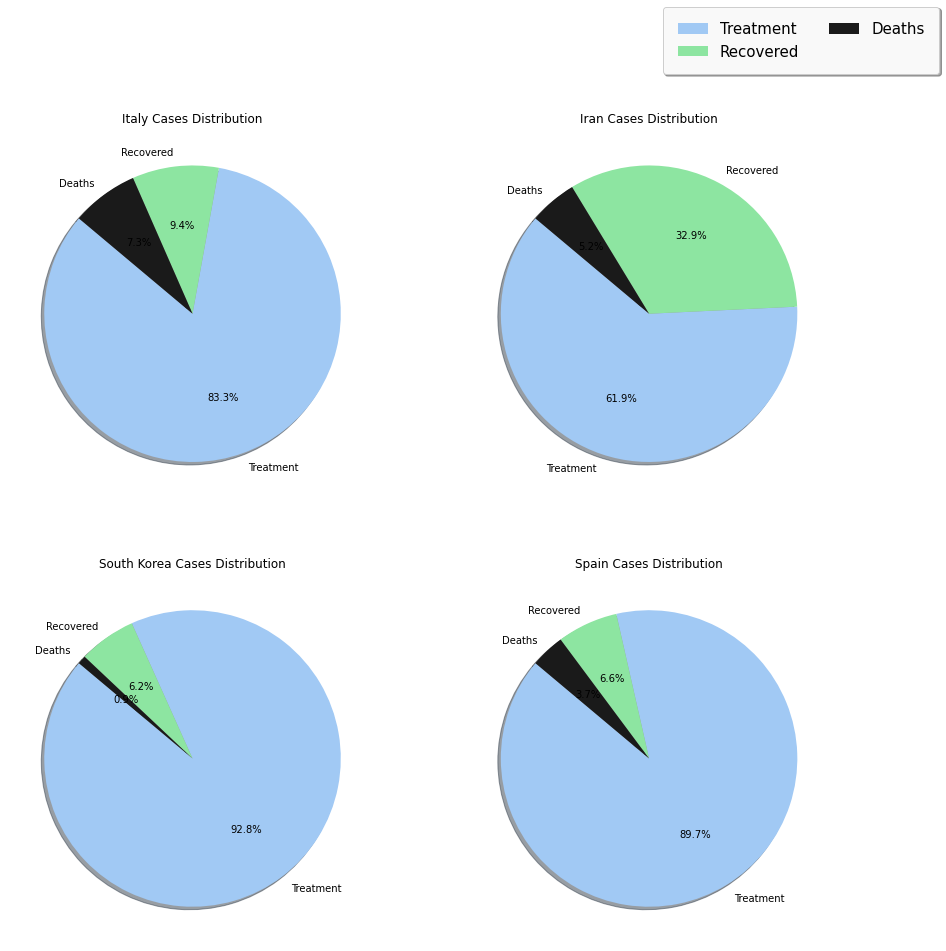

In [25]:
fig, axes = plt.subplots(
                     ncols=2,
                     nrows=2,
                     figsize=(15, 15))

ax1, ax2, ax3, ax4 = axes.flatten()

colors = ['b','g','k']
ax1.pie(Italy
           , colors=colors
           , autopct='%1.1f%%' # adding percentagens
           , labels=['Treatment','Recovered','Deaths']
           , shadow=True
           , startangle=140)
ax1.set_title("Italy Cases Distribution")

ax2.pie(Iran
           , colors=colors
           , autopct='%1.1f%%' # adding percentagens
           , labels=['Treatment','Recovered','Deaths']
           , shadow=True
           , startangle=140)
ax2.set_title("Iran Cases Distribution")

ax3.pie(SouthKorea
        , colors=colors
        , autopct='%1.1f%%' # adding percentagens
        , labels=['Treatment','Recovered','Deaths']
        , shadow=True
        , startangle=140)
ax3.set_title("South Korea Cases Distribution")



ax4.pie(Spain
           , colors=colors
           , autopct='%1.1f%%' # adding percentagens
           , labels=['Treatment','Recovered','Deaths']
           , shadow=True
           , startangle=140)
ax4.set_title("Spain Cases Distribution")

fig.legend(['Treatment','Recovered','Deaths']
           , loc = "upper right"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)

plt.show();

In [26]:
fig = px.choropleth(full_countries_df, 
                    locations="Country/Region", 
                    locationmode = "country names",
                    color="Confirmed",
                    #color_continuous_scale='Rainbow',
                    hover_name="Country/Region", 
                    animation_frame="ObservationDate"
                   )

fig.update_layout(
    title_text = 'Spread of Coronavirus',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
fig.show()

In [27]:
temp = full_countries_df.groupby('ObservationDate')['Country/Region'].nunique().reset_index()
temp.columns = ['ObservationDate','CountOfCountry']

fig = px.bar(temp, x='ObservationDate', y='CountOfCountry')
fig.update_layout(
    title_text = 'Number Of Countries With Cases',
    title_x = 0.5)
fig.show()

In [28]:
line_data = full_countries_df.groupby('ObservationDate').sum().reset_index()

line_data = line_data.melt(id_vars='ObservationDate', 
                 value_vars=['Confirmed',
                             'Deaths',
                             'Recovered', 
                             ], 
                 var_name='Ratio', 
                 value_name='Value')

fig = px.line(line_data, x="ObservationDate", y="Value", color='Ratio', 
              title='Confirmed cases, Recovered cases, and Death Over Time')
fig.show()

# **Finally your wait is over here comes DL/RNN/LSTM**

*Predictions*

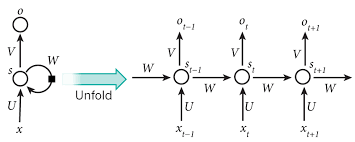

![alt text](https://www.researchgate.net/profile/Savvas_Varsamopoulos/publication/329362532/figure/fig5/AS:699592479870977@1543807253596/Structure-of-the-LSTM-cell-and-equations-that-describe-the-gates-of-an-LSTM-cell.jpg)

In [78]:
import pandas as pd
import numpy as np

df_patient = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covid_19_data_2.csv')

daily_count = df_patient.groupby('ObservationDate').Confirmed.count()
daily_count = pd.DataFrame(daily_count)
daily_count

,Confirmed
ObservationDate,
01/22/2020,38
01/23/2020,46
01/24/2020,41
01/25/2020,44
01/26/2020,47
01/27/2020,51
01/28/2020,52
01/29/2020,54
01/30/2020,58


In [79]:
data = daily_count.cumsum()
data 

,Confirmed
ObservationDate,
01/22/2020,38
01/23/2020,84
01/24/2020,125
01/25/2020,169
01/26/2020,216
01/27/2020,267
01/28/2020,319
01/29/2020,373
01/30/2020,431


In [80]:
dataset = data.iloc[14:]
dataset
dataset.columns = ['Confirmed']
print("len of the dataset::"+str(len(dataset)))
data = np.array(dataset).reshape(-1, 1)
train_data = dataset[:len(dataset)-5]#0..35
test_data = dataset[len(dataset)-5:]#35..40

train_data

len of the dataset::40


,Confirmed
ObservationDate,
02/05/2020,836
02/06/2020,907
02/07/2020,979
02/08/2020,1051
02/09/2020,1123
02/10/2020,1195
02/11/2020,1268
02/12/2020,1341
02/13/2020,1415


In [81]:
test_data

,Confirmed
ObservationDate,
03/11/2020,4935
03/12/2020,5153
03/13/2020,5383
03/14/2020,5632
03/15/2020,5890


In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)
scaled_train_data

array([[0.        ],
       [0.01828483],
       [0.0368272 ],
       [0.05536956],
       [0.07391192],
       [0.09245429],
       [0.11125418],
       [0.13005408],
       [0.14911151],
       [0.16842647],
       [0.18774144],
       [0.2070564 ],
       [0.22637136],
       [0.24568633],
       [0.26525882],
       [0.28483132],
       [0.30646407],
       [0.32809683],
       [0.34998712],
       [0.37316508],
       [0.39737317],
       [0.42338398],
       [0.45042493],
       [0.47978367],
       [0.51043008],
       [0.54262168],
       [0.57893381],
       [0.61782127],
       [0.65902653],
       [0.70357971],
       [0.75482874],
       [0.81277363],
       [0.8784445 ],
       [0.94694824],
       [1.        ]])

In [83]:
scaled_test_data

array([[1.05562709],
       [1.11176925],
       [1.1710018 ],
       [1.23512748],
       [1.30157095]])

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
n_input =3
n_features =1
                             
generator = TimeseriesGenerator(scaled_train_data,scaled_train_data, length=n_input, batch_size=1)

lstm_model = Sequential()
lstm_model.add(LSTM(19, activation='relu', input_shape = (n_input, n_features)))
lstm_model.add(Dense(10))
lstm_model.add(Dense(5))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 19)                1596      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                200       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
_________________________________________________________________


In [85]:
lstm_model.fit_generator(generator, epochs=28)

Epoch 1/28
32/32 [==============================] - 2s 59ms/step - loss: 0.2067
Epoch 2/28
32/32 [==============================] - 0s 7ms/step - loss: 0.0838
Epoch 3/28
32/32 [==============================] - 0s 6ms/step - loss: 0.0638
Epoch 4/28
32/32 [==============================] - 0s 8ms/step - loss: 0.0512
Epoch 5/28
32/32 [==============================] - 0s 7ms/step - loss: 0.0365
Epoch 6/28
32/32 [==============================] - 0s 7ms/step - loss: 0.0211
Epoch 7/28
32/32 [==============================] - 0s 7ms/step - loss: 0.0106
Epoch 8/28
32/32 [==============================] - 0s 7ms/step - loss: 0.0043
Epoch 9/28
32/32 [==============================] - 0s 7ms/step - loss: 9.9207e-04
Epoch 10/28
32/32 [==============================] - 0s 6ms/step - loss: 1.6703e-04
Epoch 11/28
32/32 [==============================] - 0s 7ms/step - loss: 3.8332e-05
Epoch 12/28
32/32 [==============================] - 0s 7ms/step - loss: 3.2414e-05
Epoch 13/28
32/32 [=============

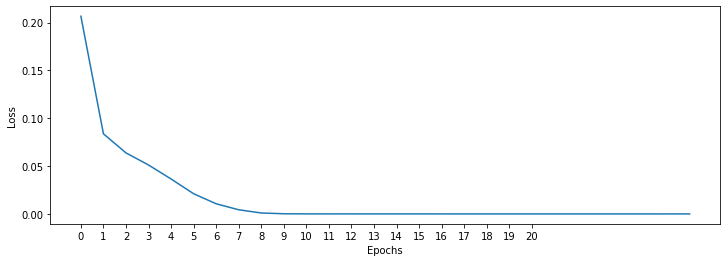

In [86]:
import matplotlib.pyplot as plt
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize = (12,4))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)), losses_lstm)

In [87]:
lstm_predictions_scaled = []

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)


# As you know we scaled our data that’s why we have to inverse it to see true predictions.
lstm_predictions_scaled

[array([1.0615252], dtype=float32),
 array([1.1183603], dtype=float32),
 array([1.1689842], dtype=float32),
 array([1.2193493], dtype=float32),
 array([1.2672986], dtype=float32)]

In [88]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled) 
lstm_predictions

array([[4957.90245116],
       [5178.59297109],
       [5375.16555047],
       [5570.73319638],
       [5756.9203831 ]])

In [89]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Confirmed,LSTM_Predictions
ObservationDate,,
03/11/2020,4935,4957.902451
03/12/2020,5153,5178.592971
03/13/2020,5383,5375.165550
03/14/2020,5632,5570.733196
03/15/2020,5890,5756.920383


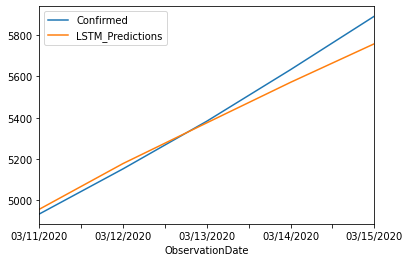

In [90]:
test_data.plot()

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('MAE of LSTM Model ',mean_absolute_error(test_data['Confirmed'], test_data['LSTM_Predictions']))

print('MSE of LSTM Model ',mean_squared_error(test_data['Confirmed'], test_data['LSTM_Predictions']))

MAE of LSTM Model  953.886824822425
MSE of LSTM Model  1267457.2035760516
